# 🌐 EOmaps - plot types

In [7]:
import sys
sys.path.append("..")
%matplotlib widget
from eomaps import Maps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from cartopy import crs as ccrs

from ipympl.backend_nbagg import Canvas

Canvas.header_visible.default_value = False
Canvas.footer_visible.default_value = False

addtitle =  lambda m, txt: m.figure.ax.text(0.5, 1.06, txt, 
                                            transform = m.figure.ax.transAxes, 
                                            horizontalalignment="center", 
                                            verticalalignment="center", 
                                            fontsize=10, 
                                            bbox=dict(fc=".75", boxstyle='round,pad=.25', ec="none"))

In [8]:
lon, lat = np.linspace(-180, 180, 1000), np.linspace(-90, 90, 1000)
lon, lat = np.meshgrid(lon, lat)

clon, clat = 5, 44
r_inner, r_outer = 10, 22
mask = (np.sqrt((lon - clon)**2 + (lat - clat)**2) <= r_outer) & (np.sqrt((lon - clon)**2 + (lat - clat)**2) >= r_inner)
lon, lat = lon[mask], lat[mask]

data = np.round(lon + lat, 1)
df = pd.DataFrame(dict(lon=lon.flat, lat=lat.flat, data=data.flat))

usedata = df.sample(1000)

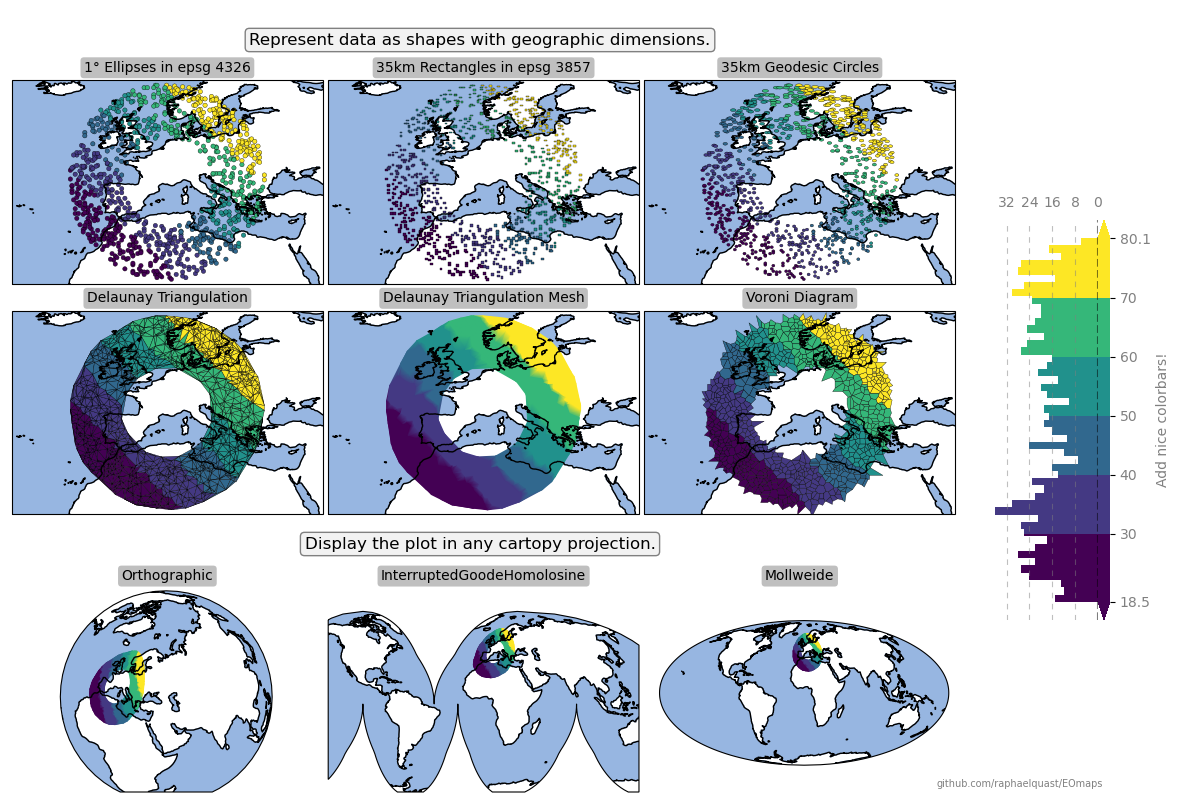

In [9]:
gs = GridSpec(4, 4, width_ratios=(1, 1, 1, .5), height_ratios=(1, 1, .1, 1))
gs.update(hspace=0.17, wspace=0.02, left=0.01, right=0.93, bottom=0.01, top=0.9)

args = dict(orientation="horizontal", colorbar=False, coastlines=True)

m = Maps()
m.set_data(data=usedata, xcoord="lon", ycoord="lat", parameter="data", crs=4326)
m.set_classify_specs(scheme=m.classify_specs.SCHEMES.UserDefined, bins=np.arange(30, 80, 10))
m.set_plot_specs(plot_epsg=4326, title="", histbins=50)

m.set_shape.ellipses(radius=0.5, radius_crs=4326)
m.plot_map(gs_ax=gs[0, 0], edgecolor="k", linewidth=0.25, **args)
addtitle(m, "1° Ellipses in epsg 4326")

m.set_shape.rectangles(radius=35000, radius_crs=3857)
m.plot_map(gs_ax=gs[0, 1], edgecolor="k", linewidth=0.25, **args)
addtitle(m, "35km Rectangles in epsg 3857")

m.set_shape.geod_circles(radius=35000)
m.plot_map(gs_ax=gs[0, 2], edgecolor="k", linewidth=0.25, **args)
addtitle(m, "35km Geodesic Circles")

m.set_shape.delaunay_triangulation(flat=True, mask_radius=1.1)
m.plot_map(gs_ax=gs[1, 0], edgecolor="k", linewidth=0.25, **args)
addtitle(m, "Delaunay Triangulation")

m.set_shape.delaunay_triangulation(flat=False, mask_radius=1.1)
m.plot_map(gs_ax=gs[1, 1], **args)
addtitle(m, "Delaunay Triangulation Mesh")

m.set_shape.voroni_diagram(mask_radius=1.1)
x = m.plot_map(gs_ax=gs[1, 2], edgecolor="k", linewidth=0.25, **args)
addtitle(m, "Voroni Diagram")


for ax in m.figure.f.axes:
    ax.set_extent((lon.min() - 1, lon.max() + 1, lat.min() - 1, lat.max() + 1),
                 crs=m.crs_list.PlateCarree())
    


m.set_shape.delaunay_triangulation(mask_radius=1.1)
m.plot_specs.crs = m.crs_list.Orthographic(central_latitude=45, central_longitude=45)
m.plot_map(gs_ax=gs[3, 0], **args)
addtitle(m, "Orthographic")

m.figure.ax.set_xlim(-9287538.873943578, 9424880.444560962)
m.figure.ax.set_ylim(-6464059.586949452, 7257353.994791463)

m.plot_specs.crs = m.crs_list.InterruptedGoodeHomolosine()
m.plot_map(gs_ax=gs[3, 1], **args)
addtitle(m, "InterruptedGoodeHomolosine")

m.figure.ax.set_xlim(-16870231.981304333, 17244055.03635715)
m.figure.ax.set_ylim(-8255719.045825919, 10851116.008060208)

m.plot_specs.crs = m.crs_list.Mollweide()
m.plot_map(gs_ax=gs[3, 2], **args)
addtitle(m, "Mollweide")

m.figure.ax.set_xlim(-19926964.196277186, 18838164.791654214)
m.figure.ax.set_ylim(-13870666.8432306, 14554966.333284175)

cb = m.add_colorbar(gs[:,-1], orientation="vertical")

cb[1].tick_params(labelcolor=".5", axis="both")
cb[1].set_ylabel("Add nice colorbars!", color=".5")
cb[2].tick_params(labelcolor=".5", axis="both")
cb[2].grid(color=".5", axis="x")

m.figure.set_colorbar_position(pos=(.825,.225, .1, .5), cb=cb)

_ = m.figure.f.text(.4, .95, "Represent data as shapes with geographic dimensions.", horizontalalignment="center", verticalalignment="center", fontsize=12, bbox=dict(fc=".95", boxstyle='round,pad=.25', ec=".5"))
_ = m.figure.f.text(.4, .32, "Display the plot in any cartopy projection.", horizontalalignment="center", verticalalignment="center", fontsize=12, bbox=dict(fc=".95", boxstyle='round,pad=.25', ec=".5"))
_ = m.figure.f.text(.85, .02, "github.com/raphaelquast/EOmaps", horizontalalignment="center", verticalalignment="center", fontsize=7, color=".5")